### Computation Graph

TODO: This notebook explains the concept of the "Computation Graph" - a DAG of small quantum subcircuits, and the process of 

In [1]:
from pathlib import Path

from cutqc2.core.cut_circuit import CutCircuit

(INFO) (base_tasks.py) (12-Sep-25 11:58:39) Pass: UnrollCustomDefinitions - 0.10729 (ms)
(INFO) (base_tasks.py) (12-Sep-25 11:58:39) Pass: BasisTranslator - 0.03552 (ms)


In [2]:
qasm_file = "../../../examples/scripts/supremacy_6qubit.qasm3"
with Path.open(qasm_file) as f:
    circuit_qasm3 = f.read()

In [3]:
cut_circuit = CutCircuit(circuit_qasm3=circuit_qasm3)
cut_circuit.cut(
    max_subcircuit_width=5,
    max_subcircuit_cuts=10,
    subcircuit_size_imbalance=2,
    max_cuts=10,
    num_subcircuits=[3],
)

cut_circuit.run_subcircuits()

(INFO) (cut_circuit.py) (12-Sep-25 11:58:39) Trying with 3 subcircuits
Set parameter Username
(INFO) (cutter.py) (12-Sep-25 11:58:39) Set parameter Username
Set parameter LicenseID to value 2646086
(INFO) (cutter.py) (12-Sep-25 11:58:39) Set parameter LicenseID to value 2646086
Academic license - for non-commercial use only - expires 2026-04-01
(INFO) (cutter.py) (12-Sep-25 11:58:39) Academic license - for non-commercial use only - expires 2026-04-01
(INFO) (cut_circuit.py) (12-Sep-25 11:58:39) Running subcircuit 0 on backend: statevector_simulator
(INFO) (cut_circuit.py) (12-Sep-25 11:58:40) Running subcircuit 1 on backend: statevector_simulator
(INFO) (cut_circuit.py) (12-Sep-25 11:58:40) Running subcircuit 2 on backend: statevector_simulator


### Original uncut circuit

In [4]:
print(cut_circuit.circuit.draw(fold=-1))

     ┌───┐     ┌─────────┐   ┌───┐        ┌─────────┐   ┌───┐      ┌───┐             
q_0: ┤ H ├──■──┤ Ry(π/2) ├───┤ T ├─────■──┤ Rx(π/2) ├───┤ T ├──────┤ H ├─────────────
     ├───┤  │  ├─────────┤   ├───┤     │  └─────────┘   └───┘      └───┘        ┌───┐
q_1: ┤ H ├──■──┤ Ry(π/2) ├───┤ T ├─────┼─────────────────────────────────────■──┤ H ├
     ├───┤┌───┐└─────────┘┌──┴───┴──┐  │             ┌─────────┐   ┌───┐     │  ├───┤
q_2: ┤ H ├┤ T ├─────■─────┤ Ry(π/2) ├──■───────■─────┤ Rx(π/2) ├───┤ T ├─────┼──┤ H ├
     ├───┤├───┤     │     └─────────┘          │     └─────────┘┌──┴───┴──┐  │  ├───┤
q_3: ┤ H ├┤ T ├─────┼──────────────────────────■──────────■─────┤ Ry(π/2) ├──■──┤ H ├
     ├───┤└───┘     │     ┌─────────┐┌───┐   ┌───┐        │     └─────────┘     └───┘
q_4: ┤ H ├──■───────■─────┤ Ry(π/2) ├┤ T ├───┤ H ├────────┼──────────────────────────
     ├───┤  │  ┌─────────┐└──┬───┬──┘└───┘   └───┘        │     ┌─────────┐┌───┐┌───┐
q_5: ┤ H ├──■──┤ Ry(π/2) ├───┤ T ├────────────────────

### Original circuit with cut locations

In [5]:
print(cut_circuit.circuit_with_cut_gates.draw(fold=-1))

     ┌───┐     ┌─────────┐   ┌───┐              ┌─────────┐┌───┐   ┌───┐                              
q_0: ┤ H ├──■──┤ Ry(π/2) ├───┤ T ├───────────■──┤ Rx(π/2) ├┤ T ├───┤ H ├──────────────────────────────
     ├───┤  │  ├─────────┤   ├───┤           │  └─────────┘└───┘   └───┘                         ┌───┐
q_1: ┤ H ├──■──┤ Ry(π/2) ├───┤ T ├───────────┼────────────────────────────────────────────────■──┤ H ├
     ├───┤┌───┐└─────────┘┌──┴───┴──┐┌────┐  │     ┌────┐       ┌─────────┐   ┌───┐   ┌───┐   │  └───┘
q_2: ┤ H ├┤ T ├─────■─────┤ Ry(π/2) ├┤ // ├──■─────┤ // ├────■──┤ Rx(π/2) ├───┤ T ├───┤ H ├───┼───────
     ├───┤├───┤     │     └─────────┘└────┘        └────┘    │  └─────────┘┌──┴───┴──┐├───┴┐  │  ┌───┐
q_3: ┤ H ├┤ T ├─────┼────────────────────────────────────────■───────■─────┤ Ry(π/2) ├┤ // ├──■──┤ H ├
     ├───┤└───┘     │     ┌─────────┐┌───┐ ┌───┐                     │     └─────────┘└────┘     └───┘
q_4: ┤ H ├──■───────■─────┤ Ry(π/2) ├┤ T ├─┤ H ├─────────────────────┼───

### Subcircuits after cutting

In [6]:
for subcircuit in cut_circuit.subcircuits:
    print(subcircuit)

     ┌───┐   ┌─────────┐┌───┐   ┌─────────┐┌───┐┌───┐
q_0: ┤ H ├─■─┤ Ry(π/2) ├┤ T ├─■─┤ Rx(π/2) ├┤ T ├┤ H ├
     ├───┤ │ ├─────────┤├───┤ │ └─────────┘├───┤└───┘
q_1: ┤ H ├─■─┤ Ry(π/2) ├┤ T ├─┼──────■─────┤ H ├─────
     └───┘   └─────────┘└───┘ │      │     └───┘     
q_2: ─────────────────────────■──────┼───────────────
                                     │     ┌───┐     
q_3: ────────────────────────────────■─────┤ H ├─────
                                           └───┘     
     ┌───┐        ┌─────────┐┌───┐┌───┐
q_0: ┤ H ├──■───■─┤ Ry(π/2) ├┤ T ├┤ H ├
     ├───┤  │   │ ├─────────┤├───┤└───┘
q_1: ┤ H ├──■───┼─┤ Ry(π/2) ├┤ T ├─────
     ├───┤┌───┐ │ ├─────────┤└───┘     
q_2: ┤ H ├┤ T ├─■─┤ Ry(π/2) ├──────────
     └───┘└───┘   └─────────┘          
                  ┌─────────┐   ┌───┐   ┌───┐     
q_0: ───────────■─┤ Rx(π/2) ├───┤ T ├───┤ H ├─────
     ┌───┐┌───┐ │ └─────────┘┌──┴───┴──┐└───┘     
q_1: ┤ H ├┤ T ├─■──────■─────┤ Ry(π/2) ├──────────
     └───┘└───┘        │     ├

### Computation Graph

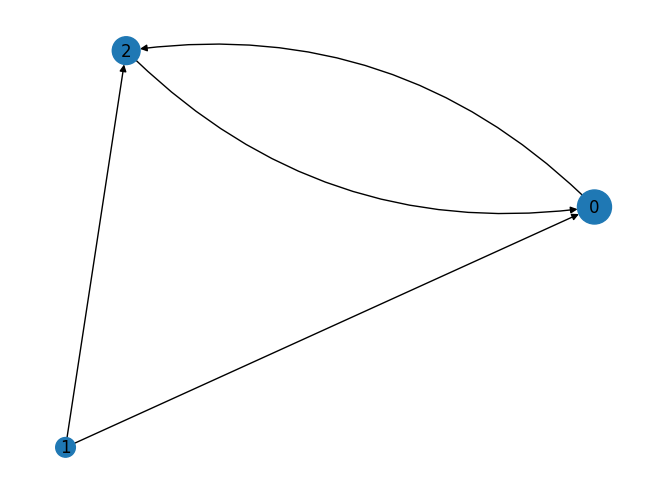

In [7]:
cut_circuit.compute_graph.draw()